# Explore CarRacing environment

In [15]:
from collections import deque
import gym

from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
env = gym.make('CarRacing-v0')

[2019-08-16 11:49:25,087] Making new env: CarRacing-v0


## Inspect State & Action Space

As we can see both, the state as well as action space are continuous in this environment.

In [3]:
env.observation_space

Box(96, 96, 3)

In [4]:
env.action_space

Box(3,)

In [5]:
env.action_space.sample()

array([ 0.09762701,  0.71518937,  0.60276338])

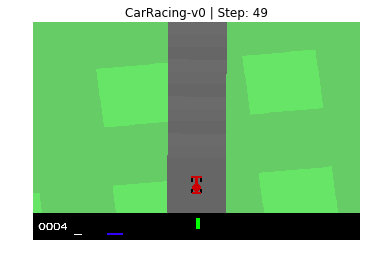

In [11]:
# Take random action and explore the environment
obs = env.reset()
info = ''
queue = deque(maxlen=6)

for step in range(50):
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    plt.title("%s | Step: %d" % (env.spec.id, step))
    plt.axis('off')    
    display.clear_output(wait=True)    
    action = env.action_space.sample()    
    next_obs, reward, done, info = env.step(action)
    queue.append((obs, action, next_obs, reward))
    obs = next_obs
    if done:
        break
env.close()

In [16]:
frame_info = queue.pop()

In [17]:
def plot_frame(frame_info):
    obs, action, next_obs, reward = frame_info
    img_obs = Image.fromarray(obs)
    img_next_obs = Image.fromarray(next_obs)
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img_obs)
    axs[1].imshow(img_next_obs)
    plt.axis('off')

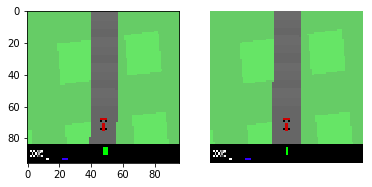

In [18]:
plot_frame(frame_info)